In [3]:
from audiofile_read import *
%pylab inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# numerical processing and scientific libraries
import numpy as np

# plotting
import matplotlib.pyplot as plt


# Rhythm Pattern Audio Extraction Library
from rp_extract import rp_extract
from rp_plot import *   # can be skipped if you don't want to do any plots


# misc
from urllib.request import urlopen
import urllib.request
import gzip
from io import StringIO
import math
import librosa
import librosa.display
from scipy.io.wavfile import write
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [122]:
# provide/adjust the path to your wav or mp3 file

audiofile_match1 = "../../Matches_Beat/9/1-accompaniment.wav"
audiofile_match2 = "../../Matches_Beat/9/accompaniment.wav"

audiofile_nichtmatch1 = "../../Matches_Beat/7/1-accompaniment.wav"
audiofile_nichtmatch2 = "../../Matches_Beat/2/accompaniment.wav"

samplerate_match1, samplewidth_match1, wavedata_match1 = audiofile_read(audiofile_match1)
samplerate_match2, samplewidth_match2, wavedata_match2 = audiofile_read(audiofile_match2)

samplerate_nichtmatch1, samplewidth_nichtmatch1, wavedata_nichtmatch1 = audiofile_read(audiofile_nichtmatch1)
samplerate_nichtmatch2, samplewidth_nichtmatch2, wavedata_nichtmatch2 = audiofile_read(audiofile_nichtmatch2)

In [123]:
features_match2 = rp_extract(wavedata_match2,                            # the two-channel wave-data of the audio-file
                                samplerate_match2,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_match1 = rp_extract(wavedata_match1,                            # the two-channel wave-data of the audio-file
                                samplerate_match1,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch1 = rp_extract(wavedata_nichtmatch1,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch1,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch2 = rp_extract(wavedata_nichtmatch2,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch2,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

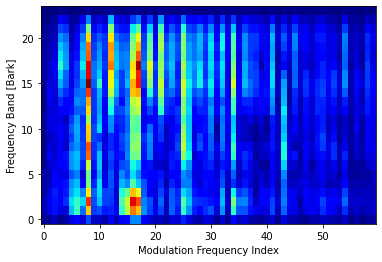

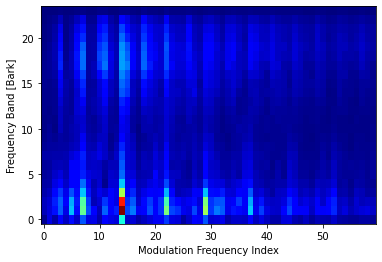

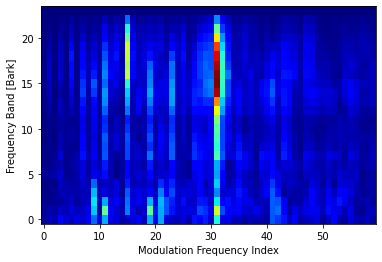

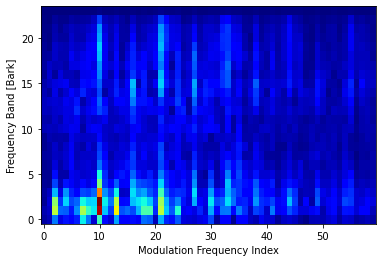

In [124]:
plotrp(features_match1['rp'])
plotrp(features_match2['rp'])
plotrp(features_nichtmatch1['rp'])
plotrp(features_nichtmatch2['rp'])

In [125]:
match1 = features_match1["rp"]
match2 = features_match2["rp"]
nichtmatch1 = features_nichtmatch1["rp"]
nichtmatch2 = features_nichtmatch2["rp"]


write("../../rp_extractor_to_wav/example_match1.wav", samplerate_match1, match1)
write("../../rp_extractor_to_wav/example_match2.wav", samplerate_match2, match2)




write("../../rp_extractor_to_wav/example_nichtmatch1.wav", samplerate_nichtmatch1, nichtmatch1)
write("../../rp_extractor_to_wav/example_nichtmatch2.wav", samplerate_nichtmatch2, nichtmatch2)

In [126]:
from math import*
from decimal import Decimal
 
class Similarity():
 
    """ Five similarity measures function """
 
    def euclidean_distance(self,x,y):
 
        """ return euclidean distance between two lists """
 
        return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
    def manhattan_distance(self,x,y):
 
        """ return manhattan distance between two lists """
 
        return sum(abs(a-b) for a,b in zip(x,y))
 
    def minkowski_distance(self,x,y,p_value):
 
        """ return minkowski distance between two lists """
 
        return self.nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),
           p_value)
 
    def nth_root(self,value, n_root):
 
        """ returns the n_root of an value """
 
        root_value = 1/float(n_root)
        return round (Decimal(value) ** Decimal(root_value),3)
 
    def cosine_similarity(self,x,y):
 
        """ return cosine similarity between two lists """
 
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = self.square_rooted(x)*self.square_rooted(y)
        return round(numerator/float(denominator),3)
 
    def square_rooted(self,x):
 
        """ return 3 rounded square rooted value """
 
        return round(sqrt(sum([a*a for a in x])),3)
 
    def jaccard_similarity(self,x,y):
 
        """ returns the jaccard similarity between two lists """
 
        intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
        union_cardinality = len(set.union(*[set(x), set(y)]))
        return intersection_cardinality/float(union_cardinality)

In [127]:
measures = Similarity()
 
print("Euclidean: ", measures.euclidean_distance(match1, match2))
print("Euclidean: ", measures.euclidean_distance(nichtmatch1, nichtmatch2))

print("Jaccard: ", measures.jaccard_similarity(match1, match2))
print("Jaccard: ", measures.jaccard_similarity(nichtmatch1, nichtmatch2))

print("Cosine: ", measures.cosine_similarity(match1, match2))
print("Cosine: ", measures.cosine_similarity(nichtmatch1, nichtmatch2))

print("Manhattan: ", measures.manhattan_distance(match2, match1))
print("Manhattan: ", measures.manhattan_distance(nichtmatch1, nichtmatch2))

print("Minkowski: ", measures.minkowski_distance(match1, match2, 1))
print("Minkowski: ", measures.minkowski_distance(nichtmatch1, nichtmatch2, 1))

Euclidean:  1.4268977046493392
Euclidean:  1.5583375617742359
Jaccard:  0.0
Jaccard:  0.0
Cosine:  0.608
Cosine:  0.547
Manhattan:  32.410999745974685
Manhattan:  32.50735057120804
Minkowski:  32.411
Minkowski:  32.507


In [128]:
# use combine the channels by calculating their geometric mean
wavedata_mono = np.mean(wavedata, axis=1)

# use combine the channels by calculating their geometric mean
wavedata_mono2 = np.mean(wavedata2, axis=1)

NameError: name 'wavedata' is not defined

In [129]:
features_match1 = rp_extract(wavedata_match1,                            # the two-channel wave-data of the audio-file
                                samplerate_match1,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_match2 = rp_extract(wavedata_match2,                            # the two-channel wave-data of the audio-file
                                samplerate_match2,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)  

features_nichtmatch1 = rp_extract(wavedata_nichtmatch1,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch1,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch2 = rp_extract(wavedata_nichtmatch2,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch2,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)  

[[0.25303832 0.25973994]
 [0.20864852 0.15341768]
 [0.19113699 0.17028701]
 [0.19545288 0.1964173 ]
 [0.25796717 0.21442051]
 [0.38591257 0.31096575]
 [0.33530223 0.26064005]
 [0.3815062  0.33605435]
 [0.9420176  1.        ]
 [1.         0.8892095 ]
 [0.7366454  0.7492946 ]
 [0.48537418 0.5327267 ]]
[[0.3800255  0.27084664]
 [0.27105632 0.2335812 ]
 [0.37525234 0.2728861 ]
 [0.2419852  0.17529102]
 [0.3163485  0.25496206]
 [0.48371556 0.40177542]
 [0.2709124  0.21188977]
 [0.31216434 0.23120348]
 [0.40924233 0.266571  ]
 [0.6432768  0.5470812 ]
 [1.         1.        ]
 [0.6314242  0.42305794]]
[[0.13160026 0.13724774 0.14184357]
 [0.17401728 0.15716265 0.16547605]
 [0.23814143 0.23172922 0.20567682]
 [0.26466957 0.31626317 0.31828186]
 [0.29013684 0.4000048  0.4814018 ]
 [0.34279788 0.33658865 0.3710668 ]
 [0.19016258 0.19252911 0.17789416]
 [0.15122393 0.15664572 0.13843212]
 [0.13094507 0.14348835 0.18743674]
 [0.6113961  0.54953784 0.50816005]
 [1.         1.         1.        ]
 [

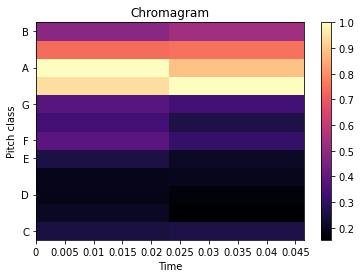

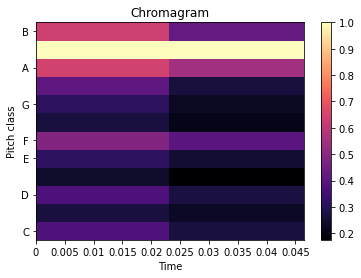

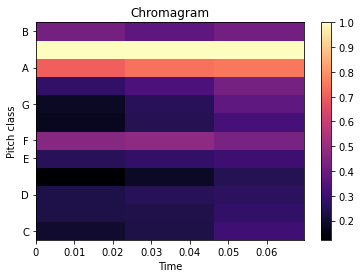

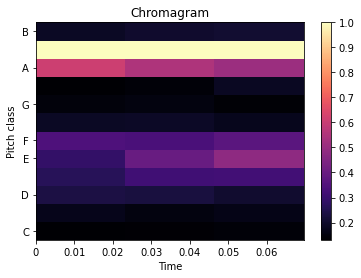

In [130]:
### MATCH
path = "../../rp_extractor_to_wav/example_match1.wav"
x, fs = librosa.load(path)
mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length= 512)
chroma_match1 = librosa.feature.chroma_stft(x, fs)

path = "../../rp_extractor_to_wav/example_match2.wav"
x, fs = librosa.load(path)
mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length= 512)
chroma_match2 = librosa.feature.chroma_stft(x, fs)



#NICHTMATCH
path = "../../rp_extractor_to_wav/example_nichtmatch1.wav"
x, fs = librosa.load(path)
mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length= 512)
chroma_nichtmatch1 = librosa.feature.chroma_stft(x, fs)

path = "../../rp_extractor_to_wav/example_nichtmatch2.wav"
x, fs = librosa.load(path)
mfcc = librosa.feature.mfcc(y=x, sr=fs, n_mfcc=12)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length= 512)
chroma_nichtmatch2 = librosa.feature.chroma_stft(x, fs)

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_match1, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_match2, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_nichtmatch1, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

fig, ax = plt.subplots()
img = librosa.display.specshow(chroma_nichtmatch2, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

print(chroma_match1)
print(chroma_match2)
print(chroma_nichtmatch2)

In [131]:
chromameasures = Similarity()
 
print("Euclidean: ", chromameasures.euclidean_distance(chroma_match1.ravel(), chroma_match2.ravel()))
print("Euclidean: ", chromameasures.euclidean_distance(chroma_nichtmatch1.ravel(), chroma_nichtmatch2.ravel()))

print("Jaccard: ", chromameasures.jaccard_similarity(chroma_match1.ravel(), chroma_match2.ravel()))
print("Jaccard: ", chromameasures.jaccard_similarity(chroma_nichtmatch1.ravel(), chroma_nichtmatch2.ravel()))

print("Cosine: ", chromameasures.cosine_similarity(chroma_match1.ravel(), chroma_match2.ravel()))
print("Cosine: ", chromameasures.cosine_similarity(chroma_nichtmatch1.ravel(), chroma_nichtmatch2.ravel()))

print("Manhattan: ", chromameasures.manhattan_distance(chroma_match2.ravel(), chroma_match1.ravel()))
print("Manhattan: ", chromameasures.manhattan_distance(chroma_nichtmatch1.ravel(), chroma_nichtmatch2.ravel()))

print("Minkowski: ", chromameasures.minkowski_distance(chroma_match1.ravel(), chroma_match2.ravel(), 1))
print("Minkowski: ", chromameasures.minkowski_distance(chroma_nichtmatch1.ravel(), chroma_nichtmatch2.ravel(), 1))

Euclidean:  1.162081170698407
Euclidean:  0.790761712248344
Jaccard:  0.022222222222222223
Jaccard:  0.014925373134328358
Cosine:  0.889
Cosine:  0.961
Manhattan:  3.9447412490844727
Manhattan:  3.937188073992729
Minkowski:  3.945
Minkowski:  3.937
